# Artificial Neural Networks

Source: Adopted from https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

### Step 1- Loading the Required Libraries and Modules

In [1]:
# Import required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

### Step 2 - Reading the Data and Performing Basic Data Checks

dataset source: https://www.kaggle.com/datasets/johndasilva/diabetes/versions/1?resource=download 

In [2]:
df = pd.read_csv('https://www.dropbox.com/s/ld8w9966o5o10ox/diabetes.csv?dl=1') 
print(df.shape)
df.describe().transpose()

(2000, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


### Step 3 - Creating Arrays for the Features and the Response Variable

In [3]:
target_column = ['Outcome']  # Create Object of Target Variable
predictors = list(set(list(df.columns))-set(target_column)) # List all features excewpt target variable
df[predictors] = df[predictors]/df[predictors].max() # Normalize predictors, i.e., scale b/w 0 and 1
df.describe().transpose() # see the data to check all features are between 0 and 1

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,0.217853,0.194474,0.000000,0.058824,0.176471,0.352941,1.0
Glucose,2000.0,0.608957,0.161149,0.000000,0.497487,0.587940,0.708543,1.0
BloodPressure,2000.0,0.566766,0.157281,0.000000,0.520492,0.590164,0.655738,1.0
SkinThickness,2000.0,0.190318,0.146393,0.000000,0.000000,0.209091,0.290909,1.0
Insulin,2000.0,0.107868,0.149436,0.000000,0.000000,0.053763,0.174731,1.0
BMI,2000.0,0.399417,0.101115,0.000000,0.339640,0.400744,0.456576,1.0
DiabetesPedigreeFunction,2000.0,0.194599,0.133699,0.032231,0.100826,0.155372,0.257851,1.0
Age,2000.0,0.408525,0.145511,0.259259,0.296296,0.358025,0.493827,1.0
Outcome,2000.0,0.342000,0.474498,0.000000,0.000000,0.000000,1.000000,1.0


### Step 4 - Creating the Training and Test Datasets

In [4]:
X = df[predictors].values # Create an array of features
y = df[target_column].values # create array of target

# split into test-train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# see shape for test and train
print(X_train.shape); print(X_test.shape)

(1400, 8)
(600, 8)


### Step 5 - Building, Predicting, and Evaluating the Neural Network Model

we will build the neural network model using the scikit-learn library's estimator object, 'Multi-Layer Perceptron Classifier'

see https://keras.io/ for Guides

In [5]:
# Load the MLP Classifier
from sklearn.neural_network import MLPClassifier

#instantiates the model with 3 'hidden_layer_sizes' with 8 neurons each (for the 8 features)
# relu is activation function and 
# adam is solver for weight optimization
# max_iter is number of iterations
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)

# Fit ANN model to training data
mlp.fit(X_train,y_train)

#Generate predictions on Training Set
predict_train = mlp.predict(X_train)
#Generate predictions on Testing Set
predict_test = mlp.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Evaluate Performance on Training Data

In [6]:
# Load Prediction Evaluation Functions
from sklearn.metrics import classification_report,confusion_matrix

# Print Confusion MAtrix for TRAINING
print("Confusion Matrix for Training Data \n", confusion_matrix(y_train,predict_train))
# Print Prediction Performance metrics for TRAINING
print("\n \n Prediction Performance for Training Data \n",classification_report(y_train,predict_train))

Confusion Matrix for Training Data 
 [[780 147]
 [166 307]]

 
 Prediction Performance for Training Data 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       927
           1       0.68      0.65      0.66       473

    accuracy                           0.78      1400
   macro avg       0.75      0.75      0.75      1400
weighted avg       0.77      0.78      0.78      1400



Support: classification population for  each class 
i.e., in training data, there were 927 class 0 and 473 class 1

Weighted average implies performance is weighted by class population
Macro Avg is not weighted

#### Evaluate Performance on TESTING Data

In [7]:
# Print Confusion MAtrix for TEST
print("Confusion Matrix for *TEST* Data \n", confusion_matrix(y_test,predict_test))
# Print Prediction Performance metrics for TRAINING
print("\n \n Prediction Performance for *TEST* Data \n",classification_report(y_test,predict_test))

Confusion Matrix for *TEST* Data 
 [[325  64]
 [ 63 148]]

 
 Prediction Performance for *TEST* Data 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       389
           1       0.70      0.70      0.70       211

    accuracy                           0.79       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.79      0.79      0.79       600



### Now let's build a regression based ANN model

Based on https://www.pluralsight.com/guides/regression-keras/

In [8]:
# Import  Keras specific modules
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [9]:
print(X_train.shape);print(y_train.shape)

print(X_test.shape); print(y_test.shape)

(1400, 8)
(1400, 1)
(600, 8)
(600, 1)


In [10]:
# Define model

model = Sequential()
model.add(Dense(3, input_dim=8, activation= "relu"))
model.add(Dense(2, activation= "relu"))
#model.add(Dense(5, activation= "relu"))
model.add(Dense(1))
model.summary() #Print model Summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 27        
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

model.fit(X_train,y_train, epochs=20)

Epoch 1/20
44/44 [==============================] - 2s 4ms/step - loss: 0.3249 - mean_squared_error: 0.3249
Epoch 2/20
44/44 [==============================] - 0s 6ms/step - loss: 0.3008 - mean_squared_error: 0.3008
Epoch 3/20
44/44 [==============================] - 0s 5ms/step - loss: 0.2812 - mean_squared_error: 0.2812
Epoch 4/20
44/44 [==============================] - 0s 3ms/step - loss: 0.2659 - mean_squared_error: 0.2659
Epoch 5/20
44/44 [==============================] - 0s 3ms/step - loss: 0.2540 - mean_squared_error: 0.2540
Epoch 6/20
44/44 [==============================] - 0s 3ms/step - loss: 0.2449 - mean_squared_error: 0.2449
Epoch 7/20
44/44 [==============================] - 0s 5ms/step - loss: 0.2383 - mean_squared_error: 0.2383
Epoch 8/20
44/44 [==============================] - 0s 9ms/step - loss: 0.2335 - mean_squared_error: 0.2335
Epoch 9/20
44/44 [==============================] - 0s 9ms/step - loss: 0.2301 - mean_squared_error: 0.2301
Epoch 10/20
44/44 [=========

Evaluate model

In [12]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
44/44 [==============================] - 2s 5ms/step - loss: 0.2238 - mean_squared_error: 0.2238
Epoch 2/20
44/44 [==============================] - 0s 5ms/step - loss: 0.2237 - mean_squared_error: 0.2237
Epoch 3/20
44/44 [==============================] - 0s 5ms/step - loss: 0.2238 - mean_squared_error: 0.2238
Epoch 4/20
44/44 [==============================] - 0s 5ms/step - loss: 0.2237 - mean_squared_error: 0.2237
Epoch 5/20
44/44 [==============================] - 0s 3ms/step - loss: 0.2238 - mean_squared_error: 0.2238
Epoch 6/20
44/44 [==============================] - 0s 3ms/step - loss: 0.2237 - mean_squared_error: 0.2237
Epoch 7/20
44/44 [==============================] - 0s 3ms/step - loss: 0.2237 - mean_squared_error: 0.2237
Epoch 8/20
44/44 [==============================] - 0s 5ms/step - loss: 0.2238 - mean_squared_error: 0.2238
Epoch 9/20
44/44 [==============================] - 0s 4ms/step - loss: 0.2239 - mean_squared_error: 0.2239
Epoch 10/20
44/44 [=========

Predict on Train and Test

In [13]:
pred_train= model.predict(X_train)
print("Train Performance:", np.sqrt(mean_squared_error(y_train,pred_train)))
print("\n ")

pred= model.predict(X_test)
print("Test Performance:",np.sqrt(mean_squared_error(y_test,pred))) 

44/44 [==============================] - 0s 6ms/step
Train Performance: 0.4729799472665411

 
19/19 [==============================] - 0s 1ms/step
Test Performance: 0.4776737768379378


# function to plot NN

In [14]:
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers
    
'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()


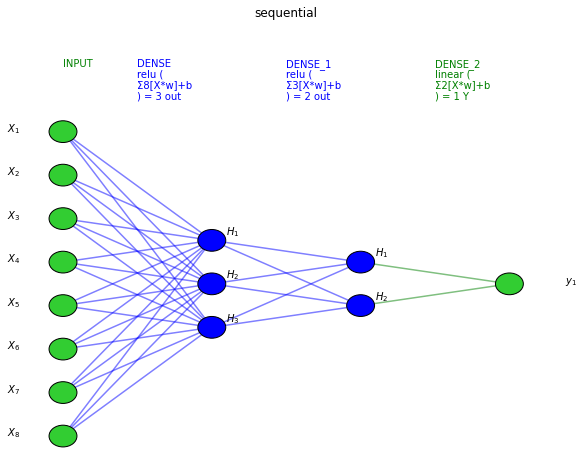

In [15]:
visualize_nn(model, description=True, figsize=(10,8))